# 🎲 Logistic Regression

**Logistic regression** is a process of modeling the probability of a discrete outcome given an input variable.

Logistic Regression was used in the biological sciences in early twentieth century. It was then used in many social science applications. Logistic Regression is used when the dependent variable(target) is categorical. 

For example : 
- To predict whether an email is spam (1) or (0)
- Whether the tumor is malignant (1) or not (0)

<center><img src="https://blog.developerspoint.org/assets/img/logistic_banner.jpg" width=900></center>


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [53]:
plt.style.use('seaborn-whitegrid')

Let's first start by loading the data in a dataframe.

In [7]:
df_students = pd.read_csv('data/students.csv')

# 🦮 Data Exploration & Linear Regression Approach

In this dataset, the features represent the marks obtained by students on two subjects, and the target is the student being admitted to a major.

In [9]:
df_students.head()

,mark1,mark2,admitted
0,6.9247,15.605,0
1,6.0573,8.779,0
2,7.1695,14.580,0
3,12.0370,17.262,1
4,15.8070,15.069,1


Since we already worked on a linear regression problem already in our last notebook, we may be tempted by plotting a linear regression line.

For the sake of an example, let's make it easier : since we are dealing with students' marks, we can just go ahead and sum up mark1 and mark2 to get an average mark and decide whether the student is admitted or not.

In [41]:
df_students['average_mark'] = df_students.apply(lambda row: (row.mark1+row.mark2)/2, axis = 1)

In [43]:
df_students.head()

,mark1,mark2,admitted,average_mark
0,6.9247,15.605,0,11.26485
1,6.0573,8.779,0,7.41815
2,7.1695,14.580,0,10.87475
3,12.0370,17.262,1,14.64950
4,15.8070,15.069,1,15.43800


For comprehension and intuition reasons, let's just reindex the columns to adjust their positioning.

In [44]:
df_students.columns

Index(['mark1', 'mark2', 'admitted', 'average_mark'], dtype='object')

In [45]:
new_cols = ['mark1', 'mark2','average_mark', 'admitted']

#or
df_students = df_students.reindex(columns=new_cols)
df_students.head()

,mark1,mark2,average_mark,admitted
0,6.9247,15.605,11.26485,0
1,6.0573,8.779,7.41815,0
2,7.1695,14.580,10.87475,0
3,12.0370,17.262,14.64950,1
4,15.8070,15.069,15.43800,1


In [47]:
features = ['average_mark']
target = 'admitted'

In [48]:
X = df_students[features].values
y = df_students[target].values.astype(np.int32)

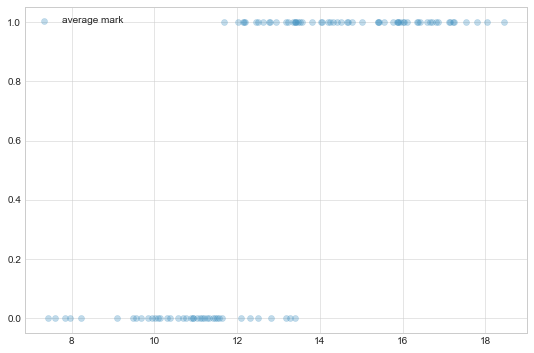

In [57]:
plt.figure(figsize=(9,6))
plt.scatter(X,y, label="average mark",alpha=0.3,cmap='viridis')
plt.legend()

Let's use the built-in sklearn linear model to determine the linear regression line.

In [58]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression()

In [61]:
y_pred = reg.predict(X)

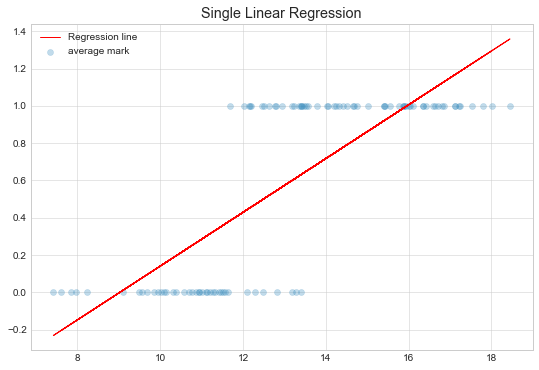

In [82]:
plt.figure(figsize=(9,6))
plt.scatter(X,y, label="average mark",alpha=0.3,cmap='viridis')
plt.plot(X, y_pred, color='red', linewidth=1,label="Regression line")
plt.title('Single Linear Regression')
plt.legend()

This looks good, but what could tell us that a student is admitted or not ?
We may think that, if the value of the prediction function $h_{\theta}$ has a value higher than 0.5,then, that student is assigned to class 1 (admitted).

Let's go ahead and make that intersection point more visible.

In [102]:
random_student = np.array([12.5]).reshape(-1,1)
prediction = reg.predict(random_student)
print('{:.2f}% of getting admitted'.format(prediction[0]*100))

50.10% of getting admitted


In [132]:
reg.intercept_, reg.coef_

(-1.30054954953893, array([0.14412669]))

In [161]:
y_pred = reg.predict(X)

In [153]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [158]:
sigmoid(0)

0.5

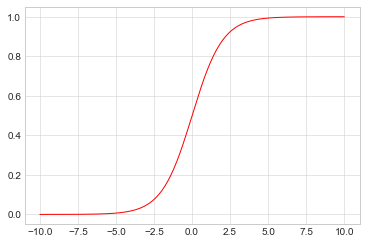

In [173]:
x_values = np.linspace(start = -10, stop = 10, num = 201)
logistic_sigmoid_values = sigmoid(x_values)
plt.plot(x_values, logistic_sigmoid_values, color='red', linewidth=1,label="Regression line")

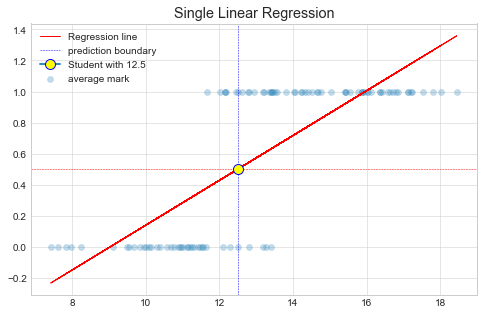

In [183]:
plt.figure(figsize=(8,5))
plt.scatter(X,y, label="average mark",alpha=0.3,cmap='viridis')
plt.plot(X, y_pred, color='red', linewidth=1,label="Regression line")
plt.axhline(y=0.5, color='r', linestyle='--',linewidth=0.5)
plt.axvline(x=12.5, color='b',linestyle='--',linewidth=0.5,label='prediction boundary')
plt.plot(random_student,prediction, marker="o", markersize=10, markeredgecolor="blue", markerfacecolor="yellow",zorder=20,label='Student with 12.5')
plt.title('Single Linear Regression')
plt.legend()

Let's look at this problem, here comes a student with an average mark of 12.5... What would you predict for him ? To be admitted or rejected ?

The model is saying that this student has 50.10% of chance of getting admitted.

However,iff we look at our dataset, it seems like some students with an average grade of 12.5 are both accepted and rejected.

This will lead to high risk problems if we were to predict whether a tumor is malign or benign. We can easily kill people if we make wrong predictions using Linear Regression on classification problems.

# 🚧 Moving to the Logistic Regression

We notice a tendancy in these data, there may be a line separing the two classes.



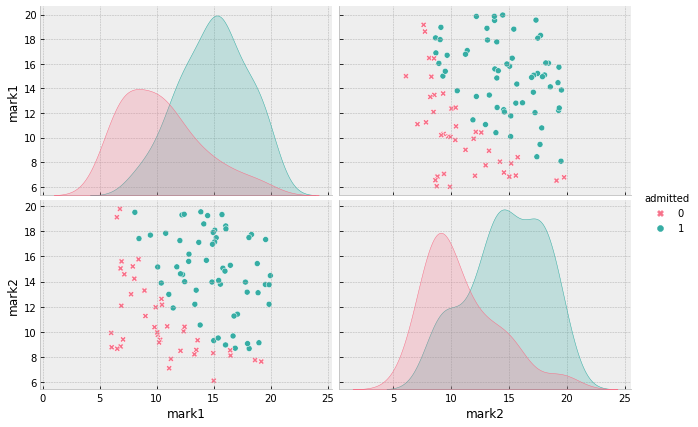

In [11]:
sns.pairplot(df_students, hue='admitted', height=3,aspect=1.5, palette="husl",markers=["X", "o"])

In [12]:
df_students['admitted'].value_counts()

1    60
0    40
Name: admitted, dtype: int64

<AxesSubplot:xlabel='admitted', ylabel='count'>

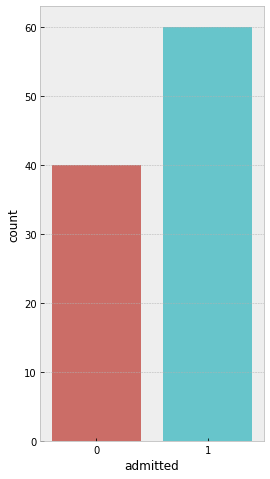

In [13]:
plt.figure(figsize=(4,8))
sns.countplot(x='admitted',data=df_students,palette='hls')

# 🔨 Model Building

In [ ]:
features = ['mark1', 'mark2']
target = 'admitted'

In [ ]:
X = df_students[features].values
y = df_students[target].values.astype(np.int32)
X.shape,y.shape

((100, 2), (100,))

In [ ]:
X[:5],y[:5]

(array([[ 6.9247, 15.605 ],
        [ 6.0573,  8.779 ],
        [ 7.1695, 14.58  ],
        [12.037 , 17.262 ],
        [15.807 , 15.069 ]]),
 array([0, 0, 0, 1, 1]))

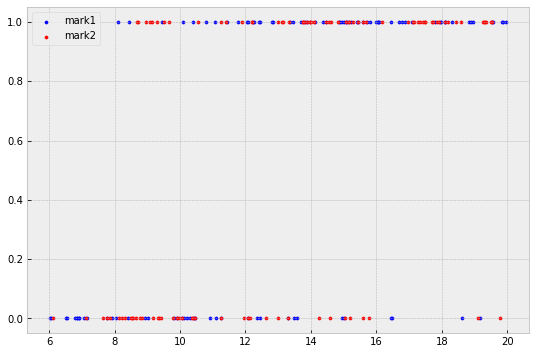

In [ ]:
plt.figure(figsize=(9,6))
plt.scatter(X[:,0],y, label="mark1",marker ='o',s=10,color='blue')
plt.scatter(X[:,1],y, label="mark2",marker ='o',s=10,color='red')
plt.legend()

Let's reuse the functions we made on the previous notebook.

In [22]:
def add_theta_0(X):
  intercept = np.ones(len(X))
  X_stacked = np.vstack((intercept, X.T)).T
  return X_stacked

In [31]:
def initialize_theta(n_features,is_random=True):
  """
  Returns bias (intercept) and weight for a vector X of n features in the form of a ndarray [theta_0,theta_1,..., theta_n].
  theta_0 being the bias, and the others the weights.
  n has to be greater or equal to 1.
  
  Parameters:
  n_features: number of features of X. If errors occur, reshape(-1,1) your vector.
  is_random: if set to False, will set values of bias and theta to zero.
  """
  if is_random:
    return np.random.rand(n_features,1) 
  else:
    return np.zeros(shape=(n_features,1))

In [25]:
def h_theta(X,theta):
  """
  This is the predict(X) function that returns y_hat.
  """
  return X.dot(theta)

In [32]:
def get_cost(X,y,theta):   #NEEDS TO BE CHANGED
           
    # initialize J (the cost)
    J = 0 

    # Calculate h = X * theta 
    h = h_theta(X,theta)
    
    # Calculate the Cost J
    J = mean_squared_error(y.reshape(-1,1),h)
    
    return J

In [33]:
def mean_squared_error(y,h_theta):
  loss = h_theta - y
  m = len(y) 
  return 1/(2*m) * np.sum(loss ** 2)

In [85]:
import time
def gradient_descent(X, y, theta, num_iters=100, alpha=0.0001,verbose=False):
  """
  Parameters:
  X : training samples
  y : training labels
  num_iters : epoches of the algorithm to reach convergence
  alpha: step of the partial derivatives
  verbose : if set to True, will log the values of the cost and theta values.
  
  Returns theta updated values, cost_history and theta history.
  """
  start = time.time()
  # Number of training examples
  m = len(y)
  y_true = np.copy(y).reshape(-1,1)
                     
  # History of costs
  result_idx = 0
  gd_iterations_df = pd.DataFrame(columns=['iteration','cost']) 
  J_history = [] 
  theta_history = []
  parameters_out = {}
  
  # Append the initial cost
  gd_iterations_df.loc[result_idx]=[0,get_cost(X,y,theta)]
  result_idx += 1
  
  for i in range(1,num_iters+1):
      # Step 1 : Calculate h = X * theta
      h = h_theta(X,theta)
      
      # Step 2 :Calculate the error = (h - y) 
      error = np.subtract(h, y_true)
      
      # Step 3 : Calculate the new theta
      theta_new = alpha * 1/m * np.sum(np.multiply(X, error),axis=0).reshape(-1,1)

      # Step 4 : Update theta
      theta = np.subtract(theta, theta_new)

      # Step 5 : Compute the cost to keep history of it
      cost = get_cost(X,y_true,theta)
      
      gd_iterations_df.loc[result_idx]=[i,cost]
      result_idx += 1
      
      J_history.append(cost)
      theta_history.append(theta.tolist())
      
      if verbose:
          print('{}/{} [>==================]  - loss: {:.2f} - theta = {}'.format(i+1,num_iters,cost,theta))
          
  print('Time spent: {:0.2f}s'.format(time.time()-start))
  parameters_out["bias"] = theta[0][0]
  parameters_out["weight"] = theta[1:]
  return parameters_out,theta, theta_history, J_history,gd_iterations_df 

In [89]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

assert sigmoid(0) == 0.5

## Descente du Gradient : Appel des fonctions

In [89]:
X = add_theta_0(X)
X[:5]

array([[ 1.    ,  6.9247, 15.605 ],
       [ 1.    ,  6.0573,  8.779 ],
       [ 1.    ,  7.1695, 14.58  ],
       [ 1.    , 12.037 , 17.262 ],
       [ 1.    , 15.807 , 15.069 ]])

Initialisation de $\theta_0$ et $\theta_1$

Let's try with two samples.

In [90]:
theta = initialize_theta(X.shape[1],is_random=False)
theta

array([[0.],
       [0.],
       [0.]])

In [91]:
# paramètres
iterations = 4000
my_alpha = 0.00001

In [92]:
initial_cost = get_cost(X,y,theta)
print('initial cost: ',initial_cost)

initial cost:  0.3


In [93]:
# Appel
parameters_out,theta, theta_history, J_history,gd_iterations_df = gradient_descent(X, y, theta, num_iters=iterations, alpha=my_alpha)

Time spent: 3.10s


In [94]:
theta

array([[-0.00021317],
       [ 0.02666061],
       [ 0.02266976]])

In [95]:
parameters_out

{'bias': -0.0002131679076726252,
 'weight': array([[0.02666061],
        [0.02266976]])}

In [96]:
gd_iterations_df

,iteration,cost
0,0.0,0.300000
1,1.0,0.298408
2,2.0,0.296827
3,3.0,0.295258
4,4.0,0.293700
...,...,...
3996,3996.0,0.079818
3997,3997.0,0.079818
3998,3998.0,0.079818
3999,3999.0,0.079818


Traçage de la fonction du coût

Text(0, 0.5, 'Cost (J)')

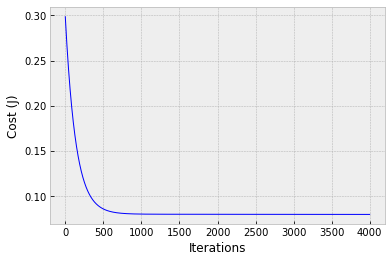

In [97]:
# Plot the J history
plt.plot(J_history[0:len(J_history)], color='blue', linewidth=1)
plt.xlabel("Iterations")
plt.ylabel("Cost (J)")

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

## Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [98]:
def drawLine():
  pass
    

# Affichage 
Graphe representant les acceptations selon les caracteristiques

In [99]:
admitted = X[np.where(y==1)]
rejected = X[np.where(y==0)]

In [100]:
parameters_out

{'bias': -0.0002131679076726252,
 'weight': array([[0.02666061],
        [0.02266976]])}

In [102]:
# Retrieve the model parameters.
b = parameters_out['bias']
w1, w2 = parameters_out['weight']
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

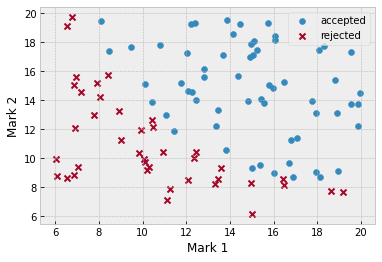

In [111]:
plt.scatter(admitted[:,1],admitted[:,2], label="accepted",marker ='o')
plt.scatter(rejected[:,1],rejected[:,2], label="rejected",marker ='x')
plt.xlabel('Mark 1')
plt.ylabel('Mark 2')
plt.legend()

Traçage du coût en fonction de theta0 et theta1

Prédire des valeurs de y

In [73]:
def predict(X,theta):
  if X.shape[0] != theta.shape[0]:
    X = add_theta_0(X)
  return sigmoid(X.dot(theta))

In [78]:
# Predire pour des notes note1= 9 et note2=17
student1 = np.array([[9,17]])

In [80]:
predict1 = predict(student1,theta)
predict1*100

array([[65.13817191]])

# 🔬 Comparison with scikit-learn
Comparer vos algorithmes à ceux de scikitlearn

# 🗑 Sheets
Mettre ici toute idée qui pourrait renforcer votre apprentissage

In [ ]:
h_test = X.dot(theta)
h_test[:6]


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
y = y.reshape(-1,1)

In [ ]:
error = h_test - y
error[:6]

array([[ 0.],
       [ 0.],
       [ 0.],
       [-1.],
       [-1.],
       [ 0.]])

In [ ]:
alpha = 0.0001
m = len(y)

In [ ]:
theta_new = alpha * 1/m * np.sum(np.multiply(X, error),axis=0).reshape(-1,1)
theta - theta_new

array([[6.000000e-05],
       [8.966297e-04],
       [8.874788e-04]])

# 📚 Ressources and References

1. *A logistic regression from scratch*,https://towardsdatascience.com/a-logistic-regression-from-scratch-3824468b1f88
2. *Logistic Regression Machine Learning Algorithm in Python from Scratch*,https://dhirajkumarblog.medium.com/logistic-regression-in-python-from-scratch-5b901d72d68e
3. *Building A Logistic Regression in Python, Step by Step*, https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8